# GalaxyChop's Tutorial

This tutorial is a guide to use `GalaxyChop` package. `GalaxyChop` performs the dynamical decomposition of a galaxy with six different methods.

In this tutorial we show, step by step, how to get started with the GalaxyChop package.

---------------------------------------------------------------------------------------------

## Import GalaxyChop and the necessary packages

First, we must import the necessary packages:

* [h5py](https://www.h5py.org/): it is used to load the data.
* [numpy](https://numpy.org/): it is used to do auxiliary calculations.
* **[galaxychop](https://pypi.org/project/galaxychop/)**: it is the library that we present in this tutorial.

In [1]:
import numpy as np
import h5py
import galaxychop as gchop

---------------------------------------------------------------------------------------------

## Quick Start guide

We provide a quick guide to using the `GalaxyChop` package to perform dynamic decomposition of a galaxy. It can be used for any of the dynamic decomposition models since they all work in the same way.

For this tutorial, we use a preloaded dataset offered by `GalaxyChop`. The data correspond to a galaxy belonging to the Illustris-TNG hydrodynamic cosmological simulations (for more information see https://www.tng-project.org/).

1) Load the data to build the `galaxy` to which it will dynamically decompose, to identify the stellar components that compose it.

In [2]:
galaxy = gchop.io.read_hdf5("../tests/datasets/gal394242.h5")
galaxy

<Galaxy stars=37393, dark_matter=155101, gas=80153, potential=True>

&ensp;&ensp;&ensp; We can also create a dataframe to manipulate it:

In [3]:
df_gal = galaxy.to_dataframe()
df_gal

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,5.224283e+05,0.045630,0.023792,-0.036427,10.773575,-6.878906,-20.425400,0.0,-195699.620206,290.293111,-195409.327095,-0.736533,0.539572,-0.570209
1,stars,0,9.745897e+05,-0.094469,0.054867,0.006084,20.282349,8.661957,-7.947495,0.0,-196176.962277,274.782915,-195902.179362,-0.488759,-0.627390,-1.931126
2,stars,0,6.935776e+05,-0.172213,-0.000511,0.047600,-14.897980,6.957092,-10.818886,0.0,-195152.120168,193.699612,-194958.420557,-0.325631,-2.572295,-1.205710
3,stars,0,1.070959e+06,-0.081766,-0.116694,0.177133,-8.665253,-4.337433,5.506927,0.0,-194695.767625,62.113089,-194633.654536,0.125676,-1.084623,-0.656530
4,stars,0,6.013803e+05,0.020734,0.023444,0.101449,23.508469,-7.842865,-3.754723,0.0,-195703.942688,314.128285,-195389.814402,0.707622,2.462754,-0.713749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272642,gas,2,1.429845e+06,44.246486,-253.661747,-240.888732,-44.183670,-152.597656,69.413803,0.0,-17314.963254,15028.258726,-2286.704528,-54366.682527,7572.031389,-17959.617014
272643,gas,2,1.436841e+06,-37.380023,-250.988099,-125.929722,-69.019005,-67.030350,35.370728,0.0,-20910.620132,5253.889589,-15656.730543,-17318.744973,10013.702701,-14817.352798
272644,gas,2,1.690580e+06,16.542737,-267.716920,-226.546536,-61.974457,-122.167450,98.398193,0.0,-17358.735183,14223.961789,-3134.773394,-54019.473934,12412.323127,-18612.594663
272645,gas,2,1.210975e+06,-220.426329,79.421367,46.584759,-96.530602,18.881409,-45.233887,0.0,-23427.833806,5860.384564,-17567.449242,-4472.122980,-14467.594426,3504.632690


2) Center and align the `galaxy` if it is not. In case the `galaxy` is ready, skip this step.

&ensp;&ensp;&ensp; Let's first check the state of the galaxy and the transform it:

In [4]:
print(f'The stellar particles have their potential energy calculated?'+\
      f' {galaxy.stars.has_potential_}')
print(f'The system has its potential energy calculated?'+\
      f' {galaxy.has_potential_}')

The stellar particles have their potential energy calculated? True
The system has its potential energy calculated? True


&ensp;&ensp;&ensp; Is this galaxy correctly pre-processed? Let build our **transformers** to check it and then do it:

In [5]:
Centralizer = gchop.preproc.Centralizer(with_potential=True)
# Because I already check that the galaxy has the potential computed

Aligner = gchop.preproc.Aligner(r_cut=10.)

print(f'The galaxy is centered?'+\
      f' {Centralizer.checker(galaxy)}')
print(f'The galaxy is aligned?'+\
      f' {Aligner.checker(galaxy)}')

The galaxy is centered? False
The galaxy is aligned? False


&ensp;&ensp;&ensp; *I want to align my galaxy, it is possible without centering it?*

In [6]:
aligned_glx = Aligner.transform(galaxy)

/home/bceliz/anaconda3/envs/try_galaxychop/lib/python3.11/site-packages/galaxychop/preproc/salign.py:156: UserWarning: Input Galaxy is not centered. Please, center it                 with Centralizer.transform(galaxy)                 or proceed with caution.
  warnings.warn(


&ensp;&ensp;&ensp; Since we don't want to interrump the workflow, just aware the user, a warning is shown and you can keep going *with caution*

In [7]:
aligned_glx

<Galaxy stars=37393, dark_matter=155101, gas=80153, potential=True>

&ensp;&ensp;&ensp; *I want to dynamically decompose my galaxy, it is posible straightforward?*

In [8]:
Decomposer = gchop.models.JThreshold(eps_cut=0.7)

decomp_glx = Decomposer.decompose(galaxy)

/home/bceliz/anaconda3/envs/try_galaxychop/lib/python3.11/site-packages/galaxychop/models/_base.py:670: UserWarning: Input Galaxy is not centered. Please, center it                     with Centralizer.transform(galaxy)                     or proceed with caution.
  warnings.warn(
/home/bceliz/anaconda3/envs/try_galaxychop/lib/python3.11/site-packages/galaxychop/models/_base.py:678: UserWarning: Input Galaxy is not aligned. Please, align it                     with Aligner.transform(galaxy)                     or proceed with caution.
  warnings.warn(


&ensp;&ensp;&ensp; Now, we can continue. We already built the **transofrmers**, but we repeat the process:

In [17]:
Centralizer = gchop.preproc.pcenter.Centralizer()
Aligner = gchop.preproc.salign.Aligner()

# 1st, let's center it (it has the potential energy calculated)
transf_gal = Centralizer.transform(galaxy)

# Then, rotate it (align its larger angular momentum component to the z axis)
transf_gal = Aligner.transform(transf_gal)

&ensp;&ensp;&ensp; Let's use the ``plot`` module of GalaxyChop to see what we've done so far

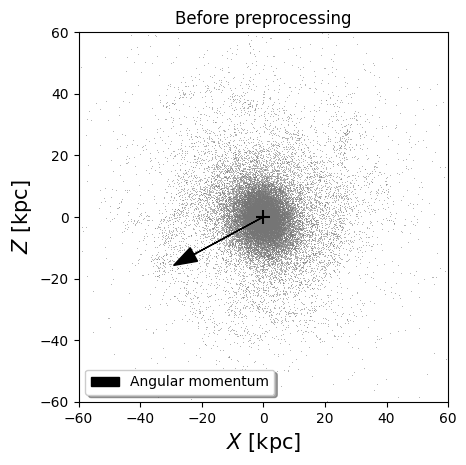

In [20]:
# Stars of the galaxy, before rotation
ax = galaxy.plot.scatter("x", "z", ptypes='stars',
                         s=1, c='k')

# The (0,0,0):
ax.scatter([0], [0], marker='+', s=100, c='k')

# The angular momentum vector:
Jx_tot = galaxy.stars.Jx_.value.sum()
Jy_tot = galaxy.stars.Jy_.value.sum()
Jz_tot = galaxy.stars.Jz_.value.sum()
J_tot = (Jx_tot**2 + Jy_tot**2 + Jz_tot**2)**(0.5)

ax.arrow(0, 0, 50 * Jx_tot/J_tot, 50 * Jz_tot/J_tot,
          color='k', head_width=5,
          label='Angular momentum')

ax.legend(loc='lower left', shadow=True)

ax.set_title('Before preprocessing')
ax.set_xlim(-60,60)
ax.set_ylim(-60,60)
ax.set_xlabel(r'$X$ [kpc]', fontsize=15)
ax.set_ylabel(r'$Z$ [kpc]', fontsize=15)
ax.set_box_aspect(1)

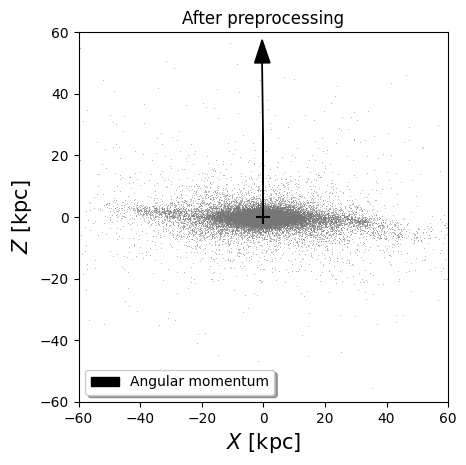

In [23]:
# Stars of the galaxy, after rotation
ax = transf_gal.plot.scatter("x", "z", ptypes='stars',
                         s=1, c='k')

# The (0,0,0):
ax.scatter([0], [0], marker='+', s=100, c='k')

# Manually mask particles according to distance:
r_stars = np.linalg.norm((transf_gal.stars.x.value,
                          transf_gal.stars.y.value,
                          transf_gal.stars.z.value), axis=0)
# The angular momentum vector:
Jx_tot = transf_gal.stars.Jx_.value[r_stars < 20.].sum()
Jy_tot = transf_gal.stars.Jy_.value[r_stars < 20.].sum()
Jz_tot = transf_gal.stars.Jz_.value[r_stars < 20.].sum()
J_tot = (Jx_tot**2 + Jy_tot**2 + Jz_tot**2)**(0.5)

ax.arrow(0, 0, 50 * Jx_tot/J_tot, 50 * Jz_tot/J_tot,
          color='k', head_width=5,
          label='Angular momentum')

ax.legend(loc='lower left', shadow=True)

ax.set_title('After preprocessing')
ax.set_xlim(-60,60)
ax.set_ylim(-60,60)
ax.set_xlabel(r'$X$ [kpc]', fontsize=15)
ax.set_ylabel(r'$Z$ [kpc]', fontsize=15)
ax.set_box_aspect(1)

&ensp;&ensp;&ensp; We can also apply a new *transform* ``Cutter``, to chop the outer particles:

In [30]:
# Especify the number of half-mass radius (r_50,*) to use. Try with thrice the r_50,*:
cuttr = gchop.preproc.Cutter(num_radii=3)

# To get the r_50,* from our galaxy (centered and aligned):
r_sh = gchop.preproc.smr_crop.get_radius_half_mass(transf_gal, particle='stars')
print('r_50,* \t=' + f' {r_sh:.2f} kpc\n')

# And the total stellar mass
M_star_tot = np.sum(transf_gal.stars.m)
print('M_* \t=' + f' {np.log10(M_star_tot.value):.2f} M_sun')

# And apply the cutter:
cuttted_gal = cuttr.transform(transf_gal)

r_50,* 	= 7.60 kpc

M_* 	= 10.57 M_sun


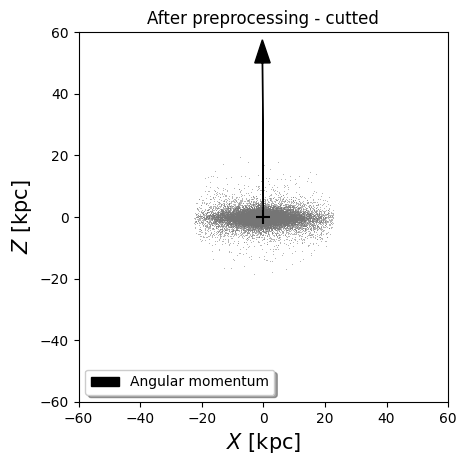

In [31]:
# Stars of the galaxy, after rotation
ax = cuttted_gal.plot.scatter("x", "z", ptypes='stars',
                          s=1, c='k')

# The (0,0,0):
ax.scatter([0], [0], marker='+', s=100, c='k')

# The angular momentum vector:
Jx_tot = cuttted_gal.stars.Jx_.value.sum()
Jy_tot = cuttted_gal.stars.Jy_.value.sum()
Jz_tot = cuttted_gal.stars.Jz_.value.sum()
J_tot = (Jx_tot**2 + Jy_tot**2 + Jz_tot**2)**(0.5)

ax.arrow(0, 0, 50 * Jx_tot/J_tot, 50 * Jz_tot/J_tot,
          color='k', head_width=5,
          label='Angular momentum')

ax.legend(loc='lower left', shadow=True)

ax.set_title('After preprocessing - cutted')
ax.set_xlim(-60,60)
ax.set_ylim(-60,60)
ax.set_xlabel(r'$X$ [kpc]', fontsize=15)
ax.set_ylabel(r'$Z$ [kpc]', fontsize=15)
ax.set_box_aspect(1)

3) Then just choose the model of interest and configure its parameters. Here we use the `JThreshold` model as an example.

In [32]:
Decomposer = gchop.models.JThreshold(eps_cut=0.7)

4) And finally dynamically decompose the galaxy and obtain the components.

In [34]:
decomp_gal = Decomposer.decompose(cuttted_gal)

&ensp;&ensp;&ensp; Now, my galaxy has become a **Decomposed Galaxy**, which harbours the state of the whole system (stars + gas + dark matter) but also knows which stellar particle was classified as 'Spheroid' or as 'Disk'.

&ensp;&ensp;&ensp; *Particles that are not stars recieve the 'NaN' label for component...*

In [35]:
# We can access both:
print(decomp_gal.galaxy)  # Idem as 'Galaxy'
print(decomp_gal.components)  # Obtained after the decomposition

<Galaxy stars=32092, dark_matter=155101, gas=80153, potential=True>
<Components length=267346, labels=['Disk', 'Spheroid', 'nan'], probabilities=False, lmap=True>


5) Get a description of the sizes and masses of each component.

In [37]:
decomp_gal.components.describe()

Particles           Deterministic mass          
              Size  Fraction               Size  Fraction
Spheroid     14675  0.459168       1.400727e+10  0.441875
Disk         17285  0.540832       1.769232e+10  0.558125

&ensp;&ensp;&ensp; Or as a dataframe:

In [38]:
df_components = decomp_gal.components.to_dataframe()
df_components

,m,labels,ptypes,lmap
0,5.224283e+05,0.0,stars,Spheroid
1,9.745897e+05,0.0,stars,Spheroid
2,6.935776e+05,0.0,stars,Spheroid
3,1.070959e+06,0.0,stars,Spheroid
4,6.013803e+05,0.0,stars,Spheroid
...,...,...,...,...
267341,1.429845e+06,NaN,gas,NaN
267342,1.436841e+06,NaN,gas,NaN
267343,1.690580e+06,NaN,gas,NaN
267344,1.210975e+06,NaN,gas,NaN


&ensp;&ensp;&ensp; See the galaxy and its components:

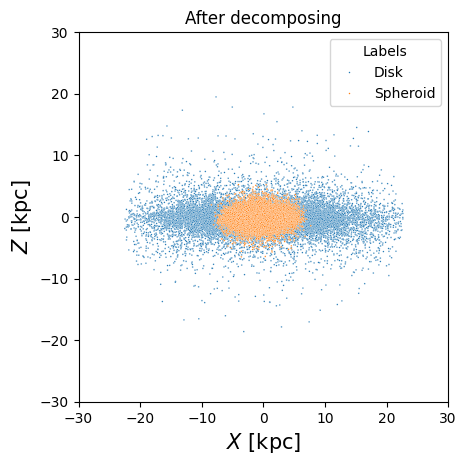

In [42]:
# Stars of the galaxy, separated by component:
# You can specify the lmap or the ptypes
ax = decomp_gal.galaxy.plot.scatter(
                        "x", "z",
                        labels=decomp_gal.components,
                        lmap={0: "Spheroid", 1: "Disk"},
                        s=5)

ax.set_title('After decomposing')
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
ax.set_xlabel(r'$X$ [kpc]', fontsize=15)
ax.set_ylabel(r'$Z$ [kpc]', fontsize=15)
ax.set_box_aspect(1)

6) Get a full description of each component.

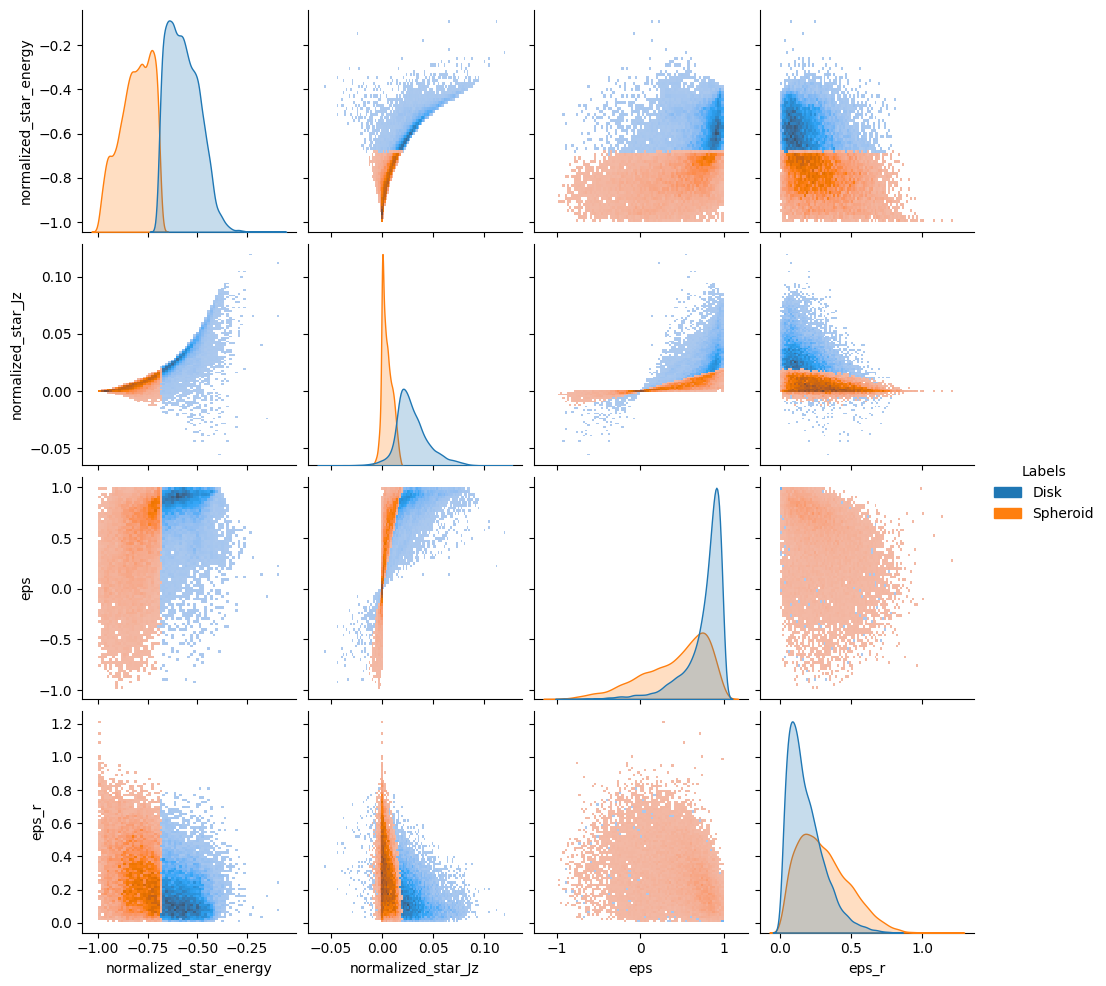

In [43]:
decomp_gal.galaxy.plot.sdyn_pairplot(labels=decomp_gal.components,
                                     lmap={0: "Spheroid", 1: "Disk"});

---------------------------------------------------------------------------------------------

## How to upload the data

The data should include stellar, dark matter and gas particles, each with their masses (m), positions (x, y, z) and velocities (vx, vy, vz). There are 3 different ways to carry out this task.

For this tutorial, we use a preloaded dataset offered by `GalaxyChop`. The data correspond to a galaxy belonging to the Illustris-TNG hydrodynamic cosmological simulations (for more information see https://www.tng-project.org/).

#### **[use h5py file reader](https://galaxy-chop.readthedocs.io/en/latest/api/io.html#galaxychop.io.read_hdf5)**:

Reads hdf5 file containing masses, positions, velocities of stellar, dark matter and gas particles, and constructs a galaxy object.

In [14]:
galaxy = gchop.io.read_hdf5("../tests/datasets/gal394242.h5")

#### **[use npy file reader](https://galaxy-chop.readthedocs.io/en/latest/api/io.html#galaxychop.io.read_npy)**:

Reads npy files containing the masses, positions and velocities of stellar particles, dark matter and gas particles, and constructs a galaxy object.

In [8]:
galaxy = gchop.io.read_npy(
    "../tests/datasets/star_ID_394242.npy",
    "../tests/datasets/dark_ID_394242.npy",
    "../tests/datasets/gas_ID_394242.npy",
    columns=["m", "x", "y", "z", "vx", "vy", "vz", "id"],
)

#### **use np.array**

Use the masses, positions and velocities of stellar, dark matter and gas particles preloaded in numpy arrays

In [ ]:
star = np.load("../tests/datasets/star_ID_394242.npy")
dark = np.load("../tests/datasets/dark_ID_394242.npy")
gas = np.load("../tests/datasets/gas_ID_394242.npy")

galaxy = gchop.mkgalaxy(
    m_s=star[:, 0],
    x_s=star[:, 1],
    y_s=star[:, 2],
    z_s=star[:, 3],
    vx_s=star[:, 4],
    vy_s=star[:, 5],
    vz_s=star[:, 6],
    m_dm=dark[:, 0],
    x_dm=dark[:, 1],
    y_dm=dark[:, 2],
    z_dm=dark[:, 3],
    vx_dm=dark[:, 4],
    vy_dm=dark[:, 5],
    vz_dm=dark[:, 6],
    m_g=gas[:, 0],
    x_g=gas[:, 1],
    y_g=gas[:, 2],
    z_g=gas[:, 3],
    vx_g=gas[:, 4],
    vy_g=gas[:, 5],
    vz_g=gas[:, 6],
)

<font color="red">*Note*</font>

> **Potential energy**
>
>If the user previously has calculated the potential energy (pot) of all particles (stars, dark matter and gas), it also can be introduced. 

<font color="red">*Warning*<font color="red">

> **Units**
>
> To create a `galaxy` object, the data **must be entered with units**. Masses in ${\rm M_{\odot}}$, positions in ${\rm kpc}$, velocities in ${\rm km/s}$ and potential energy in ${\rm (km/s)^2}$. (Note that the potential energy we use here is an specific potential energy). For this we use the package `units` from `astropy`

**Note:**
For more details, see the documentation.

---------------------------------------------------------------------------------------------

## Galaxy Object

Once the data has been loaded and the `galaxy` has been created, this is an instantiated object of the [Galaxy class](https://galaxy-chop.readthedocs.io/en/latest/api/data.html#galaxychop.data.Galaxy). The `galaxy` object contains a series of physical properties for each particle:

1) [Specific angular momentum](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.core.Galaxy.angular_momentum)

2) [Specific total energy](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.core.Galaxy.energy)

3) [Specific kinetical energy](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.core.Galaxy.kinetic_energy)

4) [Specific potential energy](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.core.Galaxy.potential_energy)

and useful methods for pre-processing the galaxy, visualizing the particle data and displaying the galaxy:

5) [Data Frame of all properties of all galaxy particles](https://galaxy-chop.readthedocs.io/)

6) [Center function](https://galaxy-chop.readthedocs.io/en/latest/api/utils.html#galaxychop.utils.center)

7) [Star align function](https://galaxy-chop.readthedocs.io/en/latest/api/utils.html#galaxychop.utils.star_align)

8) [Circular angular momentum function](https://galaxy-chop.readthedocs.io/en/latest/api/utils.html#galaxychop.utils.jcirc)

10) [plot](https://galaxy-chop.readthedocs.io/) <font color="red">Ver poner abajo</font>

<div class="alert alert-block alert-info">
<b>Note:</b> In case it is not necessary to work or analyze any of the parameters mentioned above you can directly perform the dynamical decomposition. For this, you can proceed directly to the title: <b>Dynamic decomposition methods.<b>
</div>

## Properties

#### 1. [Specific angular momentum](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.core.Galaxy.angular_momentum)

This property compute the specific angular momentum of stars, dark matter and gas particles. Then returns:

* **J_stars**: Specific angular momentum for stars particles (Jx, Jy, Jz).
* **J_dm**: Specific angular momentum for dark matter particles (Jx, Jy, Jz).
* **J_gas**: Specific angular momentum for gas particles (Jx, Jy, Jz).

In [7]:
J_stars, J_dm, J_gas = galaxy.angular_momentum_

J_stars

<Quantity [[ 6.27475207e+00,  1.45738169e+00, -9.86047089e-01, ...,
             1.28654327e+03,  3.30892004e+03, -7.27978179e+01],
           [-1.93791928e+00, -3.99291253e+00,  5.89147697e+00, ...,
            -1.07018009e+02,  4.98085077e+03,  2.65582393e+03],
           [-6.41142134e-01,  1.50099511e+00, -3.45647564e+00, ...,
             7.63342966e+03, -2.09116096e+04,  6.64404402e+03]] km kpc / s>

If you prefer separately the specific angular momentum components of some specific type of particles:

> for stars particles:
>
> ~~~~
>jx_stars = galaxy.stars.Jx_
>jy_stars = galaxy.stars.Jy_
>jz_stars = galaxy.stars.Jz_
> ~~~~

> for dark matter particles:
>
> ~~~~
>jx_dm = galaxy.dark_matter.Jx_
>jy_dm = galaxy.dark_matter.Jy_
>jz_dm = galaxy.dark_matter.Jz_
> ~~~~

> for gas particles:
>
> ~~~~
>jx_gas = galaxy.gas.Jx_
>jy_gas = galaxy.gas.Jy_
>jz_gas = galaxy.gas.Jz_
> ~~~~


#### 2. [Specific total energy](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.core.Galaxy.energy)

This property compute the total energy of stars, dark matter and gas particles. This returns:

* **E_stars**: Specific total energy of stars particles.
* **E_dm**: Specific total energy of dark matter particles.
* **E_gas**: Specific total energy of gas particles.

In [8]:
E_stars, E_dm, E_gas = galaxy.total_energy_

E_stars

<Quantity [-195409.32709522, -195902.17936196, -194958.42055658, ...,
            -16810.78858949,  -14131.74015441,  -13063.61632969] km2 / s2>

#### 3. [Specific kinetical energy](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.core.Galaxy.kinetic_energy)

If you prefer separately specific kinetic energy, this property compute the specific kinetic energy of stars, dark matter and gas particles. This returns:

* **k_stars**: Specific kinetic energy of stars particles.
* **k_dm**: Specific kinetic energy of dark matter particles.
* **k_gas**: Specific kinetic energy of gas particles.

In [9]:
k_stars, k_dm, k_gas = galaxy.kinetic_energy_

k_stars

<Quantity [  290.29311099,   274.78291519,   193.69961166, ...,
           47321.05828222,  5566.6697092 , 98418.90008429] km2 / s2>

#### 4. [Specific potential energy](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.core.Galaxy.potential_energy)

If you prefer separately specific potential energy, this property compute the specific potential energy of stars, dark matter and gas particles. This returns:

* **p_stars**: Specific potential energy of stars particles.
* **p_dm**: Specific potential energy of dark matter particles.
* **p_gas**: Specific potential energy of gas particles.

In [10]:
p_stars, p_dm, p_gas = galaxy.potential_energy_

p_stars

<Quantity [-195699.62020621, -196176.96227715, -195152.12016824, ...,
            -64131.84687171,  -19698.40986361, -111482.51641398] km2 / s2>

## Methods

#### 5. [Data Frame of all properties of all galaxy particles](https://galaxy-chop.readthedocs.io/)

This method builds a pandas data frame from the particles of the `galaxy`.

In [14]:
df = galaxy.to_dataframe()

df.head(2)

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,522428.272234,-0.046034,-0.062107,-0.262805,6.361882,22.510609,-5.777990,0.0,-195699.620206,290.293111,-195409.327095,6.274752,-1.937919,-0.641142
1,stars,0,974589.711404,-0.155805,-0.125851,-0.183509,21.987537,8.126586,0.269497,0.0,-196176.962277,274.782915,-195902.179362,1.457382,-3.992913,1.500995


#### 6. [Center function](https://galaxy-chop.readthedocs.io/en/latest/api/utils.html#galaxychop.utils.center)

This function returns a **new galaxy object** with new positions of all galaxy particles 
centered with respect to the position of the lowest potential particle.
Besides, it also recalculates the angular momentum of all particles in the galaxy.

In [16]:
centralizer = gchop.preproc.pcenter.Centralizer()
galaxy = centralizer.transform(galaxy)

#### 6.1 [Potential function](https://galaxy-chop.readthedocs.io/en/latest/api/utils.html#galaxychop.utils.center)

If you do not have the potential energy of the particles calculated, this function computes it given a backend method:
- Direct-Summation: A `fortran` implementation of the most accurate but slowest method of gravitational energy calculation. There is an alternative `numpy` backend in case of emergency.

- Nearest Neighbor Search (*experimental*): Implementation of an algorithm that take advantage of NNS and multipole expansions, using the `GriSPy` library.

In [ ]:
centralizer = gchop.preproc.pcenter.Centralizer()
galaxy = centralizer.transform(galaxy)

#### 7. [Star align function](https://galaxy-chop.readthedocs.io/en/latest/api/utils.html#galaxychop.utils.star_align)

This function returns a **new galaxy object** with positions, velocities and angular momentum
rotated so that the total angular moment coincides with the z-axis.

In [16]:
aligner = gchop.preproc.salign.Aligner()
galaxy = aligner.transform(galaxy)

#### 8. [Circular angular momentum function](https://galaxy-chop.readthedocs.io/en/latest/api/utils.html#galaxychop.utils.jcirc)

Calculation of normalized specific energy of the stars, circularity parameter, projected circularity parameter and the points: x = E_star_norm and y = J_circ(E_star_norm), to build the circular angular momentum function for stellar particles.

* **normalized_star_energy**: Normalized specific energy of stars
* **eps**: Circularity parameter (J_z/J_circ)
* **eps_r**: Projected circularity parameter (J_p/J_circ)
* **x**: Normalized specific energy for the particle with the maximum z-component of the normalized specific angular momentum per bin.
* **y**: Maximum value of the z-component of the normalized specific angular momentum per bin.


> *Note*: This calculus is necessary only for stars, but by constuction, we calculated it for all partecles.
For more information, you can access the documentation of the jcirc method in the Notes section.

In [17]:
Jcirc = gchop.preproc.jcirc(galaxy)

E_norm_star = Jcirc.normalized_star_energy
eps = Jcirc.eps
eps_r = Jcirc.eps_r
x = Jcirc.x
y = Jcirc.y

---------------------------------------------------------------------------------------------

## Dynamic decomposition methods

In GalaxyChop we present 6 models to perform the dynamical decomposition of galaxy stellar components.

* **[JThreshold](https://galaxy-chop.readthedocs.io/en/latest/api/models.html#galaxychop.models.JThreshold)**
* **[JHistogram](https://galaxy-chop.readthedocs.io/en/latest/api/models.html#galaxychop.models.JHistogram)**
* **[JEHistogram](https://galaxy-chop.readthedocs.io/en/latest/api/models.html#galaxychop.models.JEHistogram)**
* **[KMeans](https://galaxy-chop.readthedocs.io/en/latest/api/models.html#galaxychop.models.KMeans)**
* **[GaussianMixture](https://galaxy-chop.readthedocs.io/en/latest/api/models.html#galaxychop.models.GaussianMixture)**
* **[AutoGaussianMixture](https://galaxy-chop.readthedocs.io/en/latest/api/models.html#galaxychop.models.AutoGaussianMixture)**

All decomposition **models work in the same way**.

1) First, we instantiate an object with the class model

2) Second, we decompose the previously instantiated galaxy, and we obttain a "DecomposedGalaxy" that keeps the Galaxy and the Components information. The latter has the labels of components for each particle, their particle types and probabilites (only if required).
(The previous method certifies that what we introduce an instantiated galaxy with the `Galaxy` class, and performs the decomposition.)


> Decomposer = gchop.models.model()
>
> galaxy_chopped = Decomposer.decompose(galaxy)
>
> components = galaxy_chopped.components
>
> components.labels
>
> components.ptypes
>
> components.probabilities

Each label corresponds to a different galaxy stellar component.

**See documentation for full description.**

### [JThreshold](https://galaxy-chop.readthedocs.io/en/latest/api/models.html#galaxychop.models.JThreshold)

This is an implementation of the method for galaxy dynamical decomposition used in [Tissera et al.(2012)](https://ui.adsabs.harvard.edu/abs/2012MNRAS.420..255T/abstract), [Vogelsberger et al.(2014)](https://ui.adsabs.harvard.edu/abs/2014MNRAS.444.1518V/abstract), [Marinacci et al.(2014)](https://ui.adsabs.harvard.edu/abs/2014MNRAS.437.1750M/abstract), [Park et al.(2019)](https://ui.adsabs.harvard.edu/abs/2019ApJ...883...25P/abstract), etc.

In [ ]:
Decomposer = gchop.models.JThreshold()
galaxy_chopped = Decomposer.decompose(galaxy)
components = galaxy_chopped.components

In [106]:
components.labels

array([ 0.,  0.,  0., ..., nan, nan, nan])

In [107]:
components.ptypes

array(['stars', 'stars', 'stars', ..., 'gas', 'gas', 'gas'], dtype='<U11')

In [110]:
components.probabilities

### [JHistogram](https://galaxy-chop.readthedocs.io/en/latest/api/models.html#galaxychop.models.JHistogram)

This is an implementation of the method for galaxy dynamical decomposition described by [Abadi et al.(2003)](https://ui.adsabs.harvard.edu/abs/2003ApJ...597...21A/abstract).

First, we instantiate an object with the class `GCAbadi`.

In [ ]:
gcabadi = gchop.models.JHistogram()

Next, we decompose the previously instantiated galaxy

In [ ]:
gcabadi.decompose(galaxy)

The previous method certifies that what we introduce an instantiated galaxy with the `Galaxy` class, and performs the decomposition.

Then, we obtain the component to which each galaxy particle belongs:

In [13]:
gcabadi.labels_

array([ 1,  0,  1, ...,  0, -1, -1])

Each label corresponds to a different galaxy stellar component. **See documentation for full description.**

### [JEHistogram](https://galaxy-chop.readthedocs.io/en/latest/api/models.html#galaxychop.models.JEHistogram)

This is a variation of the method for galaxy dynamical decomposition implemented by [Abadi et al.(2003)](https://ui.adsabs.harvard.edu/abs/2003ApJ...597...21A/abstract).

We instantiate an object with the class `GCCristiani`.

In [ ]:
gccristiani = gchop.models.GCCristiani()

Next, we decompose the previously instantiated galaxy

In [15]:
gccristiani.decompose(galaxy)

The previous method certifies that what we introduce an instantiated galaxy with the `Galaxy` class, and performs the decomposition.

Then, we obtain the component to which each galaxy particle belongs:

In [16]:
gccristiani.labels_

array([ 0,  0,  0, ...,  0, -1, -1])

Each label corresponds to a different galaxy stellar component. **See documentation for full description.**

### [KMeans](https://galaxy-chop.readthedocs.io/en/latest/api/models.html#galaxychop.models.KMeans)

This is an implementation of [Skit-learn](https://scikit-learn.org/stable/about.html#citing-scikit-learn) K-means as a method for galaxy dynamical decomposition. 

First, we instantiate an object with the class `GCKmeans` by translating the amount of components that we want to obtain from the decomposition.

In [ ]:
gckmeans = gchop.models.GCKmeans(n_clusters=3)

Then, we decompose the previously instantiated galaxy.

In [18]:
gckmeans.decompose(galaxy)

GCKmeans()

This method certifies that what we introduce an instantiated galaxy with the `Galaxy` class, and performs the decomposition.

Then, we obtain the component to which each galaxy particle belongs:

In [19]:
gckmeans.labels_

array([ 2,  2,  1, ...,  2, -1, -1])

Each label corresponds to a different galaxy stellar component. **See documentation for full description.**

### [GaussianMixture](https://galaxy-chop.readthedocs.io/en/latest/api/models.html#galaxychop.models.GaussianMixture)

This is an implementation of the method for galaxy dynamical decomposition described by [Obreja et al.(2018)](https://ui.adsabs.harvard.edu/abs/2018MNRAS.477.4915O/abstract)

First, we instantiate an object with the class `GCgmm`.

In [ ]:
gcgmm = gchop.models.GCGmm(n_components=3)

Next, we decompose the previously instantiated galaxy

In [21]:
gcgmm.decompose(galaxy)

GCGmm()

The previous method certifies that what we introduce an instantiated galaxy with the `Galaxy` class, and performs the decomposition.

Then, we obtain the component to which each galaxy particle belongs:

In [22]:
gcgmm.labels_

array([ 1,  1,  2, ...,  1, -1, -1])

Each label corresponds to a different galaxy stellar component. **See documentation for full description.**

### [AutoGaussianMixture](https://galaxy-chop.readthedocs.io/en/latest/api/models.html#galaxychop.models.AutoGaussianMixture)

This is an implementation of the method for galaxy dynamical decomposition described by [Du et al.(2019)](https://ui.adsabs.harvard.edu/abs/2019ApJ...884..129D/abstract)

First, we instantiate an object with the class `GCAutogmm`.

In [ ]:
gcautogmm = ggchop.modelsc.GCAutogmm()

Next, we decompose the previously instantiated galaxy

In [24]:
gcautogmm.decompose(galaxy)

The previous method certifies that what we introduce an instantiated galaxy with the `Galaxy` class, and performs the decomposition.

Then, we obtain the component to which each galaxy particle belongs:

In [25]:
gcautogmm.labels_

array([ 1,  1,  1, ...,  0, -1, -1])

Each label corresponds to a different galaxy stellar component. **See documentation for full description.**

---------------------------------------------------------------------------------------------

## View the data

To visualize the loaded data, we can use the package [py-sphviewer](http://alejandrobll.github.io/py-sphviewer/content/tutorials.html) and [matplotlib](https://matplotlib.org/index.html) to plot the galaxy face-on and edge-on, or the basic Galaxychop implementation:

In [ ]:
# import matplotlib.pyplot as plt
# from sphviewer.tools import QuickView

### View the galaxy

Fist, we must align the particles with respect to the z-component of the angular momentum of star particles. For this, we use the method `align` of `galaxychop`.

**Note**

When we used the method [align](https://galaxy-chop.readthedocs.io/en/latest/api/galaxychop.html#galaxychop.utils.align) we enter the value of the `galaxy` attributes using the array accessor `arr_`; i.e.: `galaxy.arr_.x_s` returns the value of `x_s` without units.

In [27]:
rot_part = gc.align(
    galaxy.arr_.m_s,
    galaxy.arr_.x_s,
    galaxy.arr_.y_s,
    galaxy.arr_.z_s,
    galaxy.arr_.vx_s,
    galaxy.arr_.vy_s,
    galaxy.arr_.vz_s,
    galaxy.arr_.x_dm,
    galaxy.arr_.y_dm,
    galaxy.arr_.z_dm,
    galaxy.arr_.vx_dm,
    galaxy.arr_.vy_dm,
    galaxy.arr_.vz_dm,
    galaxy.arr_.x_g,
    galaxy.arr_.y_g,
    galaxy.arr_.z_g,
    galaxy.arr_.vx_g,
    galaxy.arr_.vy_g,
    galaxy.arr_.vz_g,
    r_cut=8,
)

Here we create the vectors needed to plot. In this example we plot only **stars**.

In [28]:
pos = np.array([rot_part[:3]]).T
mass = galaxy.m_s

Text(0, 0.5, 'z [kpc]')

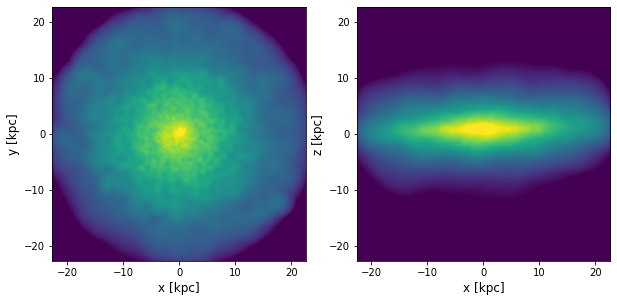

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

qv = QuickView(pos, mass, r="infinity", plot=False)
img = qv.get_image()
extent = qv.get_extent()
ax[0].imshow(img, extent=extent, vmin=5.5, vmax=8.8)
ax[0].set_xlabel("x [kpc]", fontsize=12)
ax[0].set_ylabel("y [kpc]", fontsize=12)

qv = QuickView(pos, mass, r="infinity", plot=False, t=90)
img = qv.get_image()
extent = qv.get_extent()
ax[1].imshow(img, extent=extent, vmin=5.5, vmax=8.8)
ax[1].set_xlabel("x [kpc]", fontsize=12)
ax[1].set_ylabel("z [kpc]", fontsize=12)

### EXAMPLE: view the components

In this example, we plot the decompotion output of `GCAbadi` model.

In [30]:
gcabadi = gc.GCAbadi()
gcabadi.decompose(galaxy)
gcabadi.labels_

array([ 1,  0,  1, ...,  0, -1, -1])

To select the particles you only need: 

In [31]:
label = gcabadi.labels_

(spheroid,) = np.where(label == 0)
(disk,) = np.where(label == 1)
(others,) = np.where(label == -1)

For **disk** particles

Text(0, 0.5, 'z [kpc]')

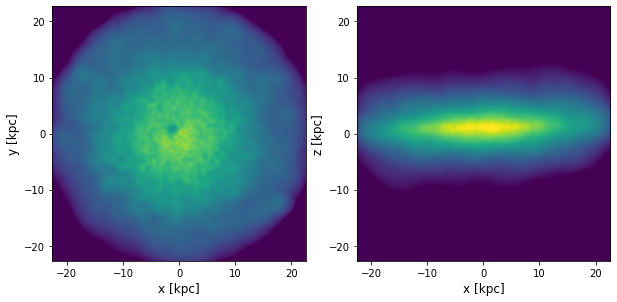

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

qv = QuickView(pos[disk], mass[disk], r="infinity", plot=False)
img = qv.get_image()
extent = qv.get_extent()
ax[0].imshow(img, extent=extent, vmin=5.5, vmax=8.8)
ax[0].set_xlabel("x [kpc]", fontsize=12)
ax[0].set_ylabel("y [kpc]", fontsize=12)

qv = QuickView(pos[disk], mass[disk], r="infinity", plot=False, t=90)
img = qv.get_image()
extent = qv.get_extent()
ax[1].imshow(img, extent=extent, vmin=5.5, vmax=8.8)
ax[1].set_xlabel("x [kpc]", fontsize=12)
ax[1].set_ylabel("z [kpc]", fontsize=12)

For **spheroid** particles:

Text(0, 0.5, 'z [kpc]')

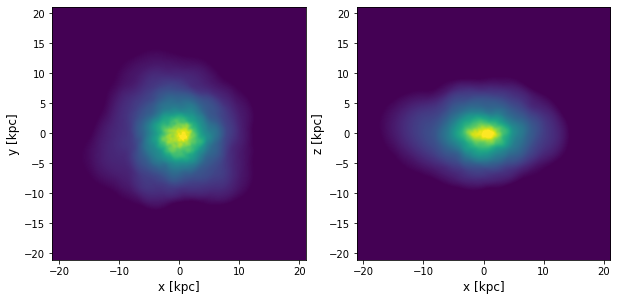

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

qv = QuickView(pos[spheroid], mass[spheroid], r="infinity", plot=False)
img = qv.get_image()
extent = qv.get_extent()
ax[0].imshow(img, extent=extent, vmin=5.5, vmax=8.8)
ax[0].set_xlabel("x [kpc]", fontsize=12)
ax[0].set_ylabel("y [kpc]", fontsize=12)

qv = QuickView(pos[spheroid], mass[spheroid], r="infinity", plot=False, t=90)
img = qv.get_image()
extent = qv.get_extent()
ax[1].imshow(img, extent=extent, vmin=5.5, vmax=8.8)
ax[1].set_xlabel("x [kpc]", fontsize=12)
ax[1].set_ylabel("z [kpc]", fontsize=12)

The label **others** is for all particles that are not classified as **spheroid** or **disk**